In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense, Activation,Dropout,Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras import regularizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model, Sequential
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import time
import os
from PIL import Image
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
import zipfile
import os
from google.colab import files


import logging
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # FATAL
logging.getLogger('tensorflow').setLevel(logging.FATAL)

In [3]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving train_ASD_DATA.zip to train_ASD_DATA.zip


['train_ASD_DATA']

In [4]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving test_ASD_DATA.zip to test_ASD_DATA.zip


['test', 'train_ASD_DATA']

In [5]:
# Upload dataset from local machine
uploaded = files.upload()

# Extract the uploaded zip file
zip_file = list(uploaded.keys())[0]
with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall('dataset')

# Verify extraction
os.listdir('dataset')


Saving valid_ASD_DATA.zip to valid_ASD_DATA.zip


['test', 'train_ASD_DATA', 'valid']

In [6]:
train_asd_dir = '/content/dataset/train_ASD_DATA/train/Autistic'
train_nasd_dir ='/content/dataset/train_ASD_DATA/train/Non_Autistic'
validation_asd_dir ='/content/dataset/valid/Autistic'
validation_nasd_dir ='/content/dataset/valid/Non_Autistic'
test_asd_dir = '/content/dataset/test/Autistic'
test_nasd_dir = '/content/dataset/test/Non_Autistic'

In [7]:

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [8]:
# Data Au

Data Augmentation

In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/dataset/valid',
                                           target_size=(224,224),
                                           batch_size = 10,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                            target_size=(224,224),
                                            batch_size = 10,
                                            class_mode='binary',
                                            shuffle=False)

Found 2526 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


Pretained VGG19 Model

In [10]:

from tensorflow.keras.applications.vgg19 import VGG19

base_model = VGG19(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')


80134624/80134624 [==============================] - 5s 0us/step


Basic VGG19 Weight Not updated



In [11]:

#To set the layers to non-trainable (weights will not be updated)
for layer in base_model.layers:
    layer.trainable = False

Last layer changed as per below



In [12]:
from tensorflow.keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

from keras import optimizers

learning_rate=0.0001

model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate), loss = 'binary_crossentropy',metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [13]:
model.summary()


Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [14]:
import time
from keras.callbacks import ModelCheckpoint, EarlyStopping

# Record the start time
start_time = time.time()

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='/content/gdrive/MyDrive/DNN Keras Models/best_model.h5',
                                   save_best_only=True,
                                   monitor='val_loss',
                                   mode='min',
                                   verbose=1)

# Train the model
asd_vgg19_best = model.fit(train_set,
                           validation_data=valid_set,
                           steps_per_epoch=158,
                           epochs=100,
                           verbose=1,
                           callbacks=[early_stopping, model_checkpoint])

# Calculate training time
training_time = time.time() - start_time
hours, rem = divmod(training_time, 3600)
minutes, seconds = divmod(rem, 60)

# Print training time
print(f"Training completed in: {int(hours):0>2}:{int(minutes):0>2}:{seconds:05.2f}")
print(f"Total training time in seconds: {training_time:.2f}")

# To discover the training epoch on which training was stopped
final_epoch = len(asd_vgg19_best.history['loss'])
print(f"Training stopped at epoch: {final_epoch}")

# Additional notes:
# 1. The "verbose" argument is set to 1 in the fit function, which will show progress for each epoch.
# 2. The patience in EarlyStopping is set to 10, which is a good rule of thumb (about 10% of total epochs).
# 3. ModelCheckpoint is used to save the best model observed during training.

Epoch 1/100
158/158 [==============================] - ETA: 0s - loss: 0.6361 - acc: 0.6808
Epoch 1: val_loss improved from inf to 0.31041, saving model to /content/gdrive/MyDrive/DNN Keras Models/best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


158/158 [==============================] - 34s 167ms/step - loss: 0.6361 - acc: 0.6808 - val_loss: 0.3104 - val_acc: 0.9125
Epoch 2/100
158/158 [==============================] - ETA: 0s - loss: 0.5203 - acc: 0.7563
Epoch 2: val_loss improved from 0.31041 to 0.30614, saving model to /content/gdrive/MyDrive/DNN Keras Models/best_model.h5
158/158 [==============================] - 24s 151ms/step - loss: 0.5203 - acc: 0.7563 - val_loss: 0.3061 - val_acc: 0.9000
Epoch 3/100
158/158 [==============================] - ETA: 0s - loss: 0.5080 - acc: 0.7519
Epoch 3: val_loss improved from 0.30614 to 0.29047, saving model to /content/gdrive/MyDrive/DNN Keras Models/best_model.h5
158/158 [==============================] - 24s 152ms/step - loss: 0.5080 - acc: 0.7519 - val_loss: 0.2905 - val_acc: 0.9000
Epoch 4/100
158/158 [==============================] - ETA: 0s - loss: 0.4841 - acc: 0.7602
Epoch 4: val_loss did not improve from 0.29047
158/158 [==============================] - 24s 151ms/step -

In [15]:
model.save('/content/dataset/Models/VGG19_best.h5')


In [16]:
asd_vgg19 = model.fit(train_set, validation_data = valid_set, steps_per_epoch = 100, epochs = 100)


Epoch 1/100
100/100 [==============================] - 15s 146ms/step - loss: 0.1186 - acc: 0.9500 - val_loss: 0.1658 - val_acc: 0.9250
Epoch 2/100
100/100 [==============================] - 15s 145ms/step - loss: 0.1094 - acc: 0.9580 - val_loss: 0.1538 - val_acc: 0.9625
Epoch 3/100
100/100 [==============================] - 15s 145ms/step - loss: 0.0872 - acc: 0.9720 - val_loss: 0.1323 - val_acc: 0.9625
Epoch 4/100
100/100 [==============================] - 15s 145ms/step - loss: 0.1001 - acc: 0.9560 - val_loss: 0.1335 - val_acc: 0.9625
Epoch 5/100
100/100 [==============================] - 14s 144ms/step - loss: 0.0888 - acc: 0.9739 - val_loss: 0.1311 - val_acc: 0.9500
Epoch 6/100
100/100 [==============================] - 15s 151ms/step - loss: 0.1382 - acc: 0.9460 - val_loss: 0.1263 - val_acc: 0.9375
Epoch 7/100
100/100 [==============================] - 14s 144ms/step - loss: 0.1117 - acc: 0.9629 - val_loss: 0.1353 - val_acc: 0.9375
Epoch 8/100
100/100 [===========================

In [17]:

model.save('/content/dataset/Models/VGG19_100.h5')



In [18]:
from google.colab import files

# Specify the path of the file you want to download
file_path = '/content/dataset/Models/VGG19_100.h5'

# Download the file
files.download(file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Model Loss plotting

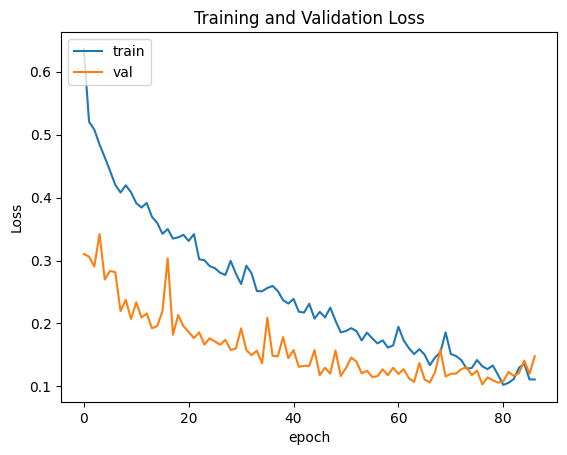

In [19]:
import keras
from matplotlib import pyplot as plt


plt.plot(asd_vgg19_best.history['loss'])
plt.plot(asd_vgg19_best.history['val_loss'])
plt.title('Training and Validation Loss')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Model Accuracy Plotting



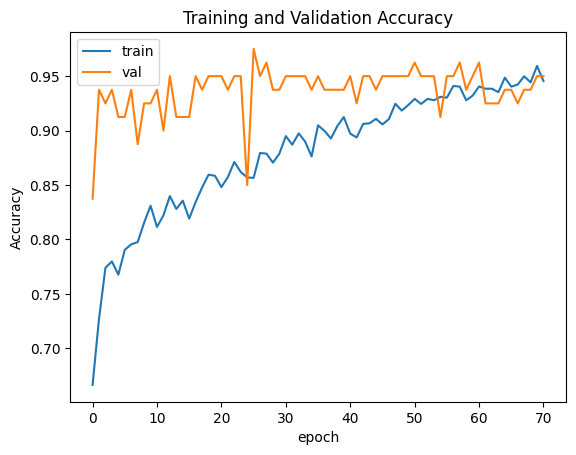

In [ ]:

import keras
from matplotlib import pyplot as plt


plt.plot(asd_vgg19_best.history['acc'])
plt.plot(asd_vgg19_best.history['val_acc'])
plt.title('Training and Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Prediction of an Image of Test Set



1/1 [==============================] - 2s 2s/step


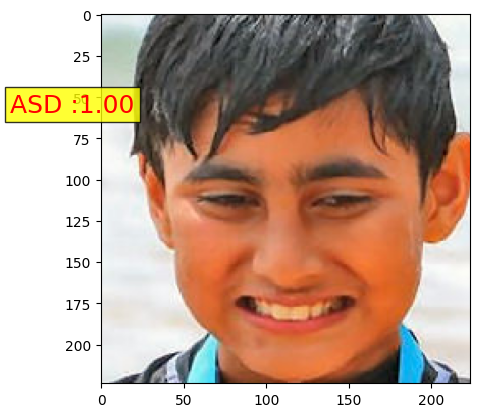

In [20]:

#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Autistic/ta.002.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 [==============================] - 0s 42ms/step


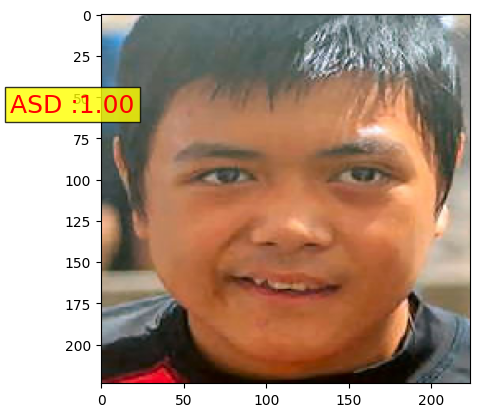

In [21]:

#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Autistic/ta.005.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

1/1 [==============================] - 0s 49ms/step


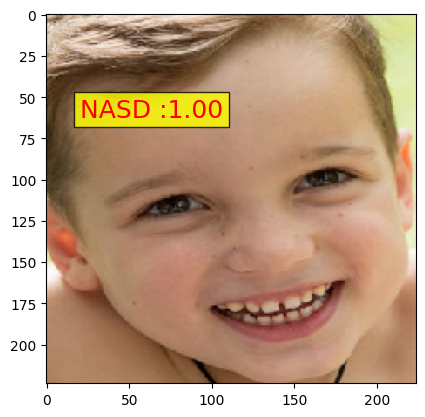

In [22]:

#Prediction of image
%matplotlib inline
import tensorflow
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img1 = image.load_img('/content/dataset/test/Non_Autistic/tna.009.jpg', target_size=(224, 224))
img = image.img_to_array(img1)
img = img/255
# create a batch of size 1 [N,H,W,C]
img = np.expand_dims(img, axis=0)
prediction = model.predict(img, batch_size=None,steps=1) #gives all class prob.
if(prediction[:,:]>0.5):
    value ='NASD :%1.2f'%(prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,bbox=dict(facecolor='yellow',alpha=0.8))
else:
    value ='ASD :%1.2f'%(1.0-prediction[0,0])
    plt.text(20, 62,value,color='red',fontsize=18,horizontalalignment='right',
        verticalalignment='bottom',bbox=dict(facecolor='yellow',alpha=0.8))

plt.imshow(img1)
plt.show()

In [23]:
import pandas as pd
import time
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Reset the test set (if needed)
test_set.reset()

# Measure inference time
start_inference_time = time.time()
ytesthat = model.predict_generator(test_set)
end_inference_time = time.time()
inference_time = end_inference_time - start_inference_time

print(f"Inference time: {inference_time} seconds")

# Create a DataFrame to store the results
df = pd.DataFrame({
    'filename': test_set.filenames,
    'predict': ytesthat[:, 0],
    'y': test_set.classes
})

# Convert the predicted probabilities to binary predictions
y_pred_binary = (ytesthat > 0.5).astype(int)

# Get the true labels from the test set
y_true = test_set.classes

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_binary)

# Calculate precision
precision = precision_score(y_true, y_pred_binary)

# Calculate recall
recall = recall_score(y_true, y_pred_binary)

# Calculate F1 score
f1 = f1_score(y_true, y_pred_binary)

# Print the metrics
print("Test Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


<ipython-input-23-f4f588b33b4c>:10: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


Inference time: 2.6044909954071045 seconds
Test Accuracy: 0.9607142857142857
Precision: 0.9708029197080292
Recall: 0.95
F1 Score: 0.9602888086642599




Confusion Matrix of Test Set


In [24]:


import pandas as pd
test_set.reset
ytesthat = model.predict_generator(test_set)
df = pd.DataFrame({
    'filename':test_set.filenames,
    'predict':ytesthat[:,0],
    'y':test_set.classes
})


<ipython-input-24-83125e26fe9f>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytesthat = model.predict_generator(test_set)


In [25]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [26]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 280 Testing images : %d'%misclassified['y'].count())



Total misclassified image from 280 Testing images : 11


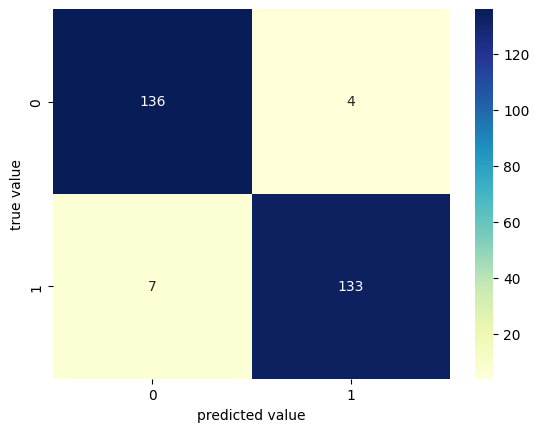

In [27]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');


Confusion Matrix of Train Set


In [28]:


from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

#Training Set
train_set = train_datagen.flow_from_directory('/content/dataset/train_ASD_DATA/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                              shuffle=False,
                                             class_mode='binary')


Found 2526 images belonging to 2 classes.


In [ ]:

import pandas as pd
train_set.reset
ytrainhat = model.predict_generator(train_set)
df = pd.DataFrame({
    'filename':train_set.filenames,
    'predict':ytrainhat[:,0],
    'y':train_set.classes
})


<ipython-input-29-86d4ed593533>:3: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  ytrainhat = model.predict_generator(train_set)


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)

In [ ]:
misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 2526 Training images : %d'%misclassified['y'].count())

In [ ]:
#Prediction of test set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');

Confusion Matrix of Validation Set


In [ ]:


import pandas as pd
valid_set.reset
yvalidhat = model.predict_generator(valid_set)
df = pd.DataFrame({
    'filename':valid_set.filenames,
    'predict':yvalidhat[:,0],
    'y':valid_set.classes
})


In [ ]:

pd.set_option('display.float_format', lambda x: '%.5f' % x)
df['y_pred'] = df['predict']>0.5
df.y_pred = df.y_pred.astype(int)


In [ ]:

misclassified = df[df['y']!=df['y_pred']]
print('Total misclassified image from 80 Validation images : %d'%misclassified['y'].count())

In [ ]:
#Prediction of valid set
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

conf_matrix = confusion_matrix(df.y,df.y_pred)
sns.heatmap(conf_matrix,cmap="YlGnBu",annot=True,fmt='g');
plt.xlabel('predicted value')
plt.ylabel('true value');